# Zadanie domowe $-$ interpolacja dwusześcienna

Interpolacja dwusześcienna to, podobnie jak w przypadku interpolacji dwuliniowej, rozszerzenie idei interpolacji jednowymiarowej na dwuwymiarową siatkę.
W trakcie jej obliczania wykorzystywane jest 16 pikseli z otoczenia (dla dwuliniowej 4).
Skutkuje to zwykle lepszymi wynikami - obraz wyjściowy jest bardziej gładki i z mniejszą liczbą artefaktów.
Ceną jest znaczny wzrost złożoności obliczeniowej (zostało to zaobserwowane podczas ćwiczenia).

Interpolacja dana jest wzorem:
\begin{equation}
I(i,j) = \sum_{i=0}^{3} \sum_{j=0}^{3} a_{ij} x^i y^j
\end{equation}

Zadanie sprowadza się zatem do wyznaczenia 16 współczynników $a_{ij}$.
W tym celu wykorzystuje się, oprócz wartości w punktach $A$ (0,0), $B$ (1,0), $C$ (1,1), $D$ (0,1) (por. rysunek dotyczący interpolacji dwuliniowej), także pochodne cząstkowe $A_x$, $A_y$, $A_{xy}$.
Pozwala to rozwiązać układ 16-tu równań.

Jeśli zgrupujemy parametry $a_{ij}$:
\begin{equation}
a = [ a_{00}~a_{10}~a_{20}~a_{30}~a_{01}~a_{11}~a_{21}~a_{31}~a_{02}~a_{12}~a_{22}~a_{32}~a_{03}~a_{13}~a_{23}~a_{33}]^T
\end{equation}

i przyjmiemy:
\begin{equation}
x = [A~B~D~C~A_x~B_x~D_x~C_x~A_y~B_y~D_y~C_y~A_{xy}~B_{xy}~D_{xy}~C_{xy}]^T
\end{equation}

To zagadnienie można opisać w postaci równania liniowego:
\begin{equation}
Aa = x
\end{equation}
gdzie macierz $A^{-1}$ dana jest wzorem:

\begin{equation}
A^{-1} =
\begin{bmatrix}
1& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0 \\
0&  0&  0&  0&  1&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0 \\
-3&  3&  0&  0& -2& -1&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0 \\
2& -2&  0&  0&  1&  1&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0 \\
0&  0&  0&  0&  0&  0&  0&  0&  1&  0&  0&  0&  0&  0&  0&  0 \\
0&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0&  1&  0&  0&  0 \\
0&  0&  0&  0&  0&  0&  0&  0& -3&  3&  0&  0& -2& -1&  0&  0 \\
0&  0&  0&  0&  0&  0&  0&  0&  2& -2&  0&  0&  1&  1&  0&  0 \\
-3&  0&  3&  0&  0&  0&  0&  0& -2&  0& -1&  0&  0&  0&  0&  0 \\
0&  0&  0&  0& -3&  0&  3&  0&  0&  0&  0&  0& -2&  0& -1&  0 \\
9& -9& -9&  9&  6&  3& -6& -3&  6& -6&  3& -3&  4&  2&  2&  1 \\
-6&  6&  6& -6& -3& -3&  3&  3& -4&  4& -2&  2& -2& -2& -1& -1 \\
2&  0& -2&  0&  0&  0&  0&  0&  1&  0&  1&  0&  0&  0&  0&  0 \\
0&  0&  0&  0&  2&  0& -2&  0&  0&  0&  0&  0&  1&  0&  1&  0 \\
-6&  6&  6& -6& -4& -2&  4&  2& -3&  3& -3&  3& -2& -1& -2& -1 \\
4& -4& -4&  4&  2&  2& -2& -2&  2& -2&  2& -2&  1&  1&  1&  1 \\
\end{bmatrix}
\end{equation}

Potrzebne w rozważaniach pochodne cząstkowe obliczane są wg następującego przybliżenia (przykład dla punktu A):
\begin{equation}
A_x = \frac{I(i+1,j) - I(i-1,j)}{2}
\end{equation}
\begin{equation}
A_y = \frac{I(i,j+1) - I(i,j-1)}{2}
\end{equation}
\begin{equation}
A_{xy} = \frac{I(i+1,j+1) - I(i-1,j) - I(i,j-1) + I(i,j)}{4}
\end{equation}

## Zadanie

Wykorzystując podane informacje, zaimplementuj interpolację dwusześcienną.
Uwagi:
- macierz $A^{-1}$ dostępna jest w pliku *ainvert.py*,
- trzeba się zastanowić nad potencjalnym wykraczaniem poza zakres obrazka (jak zwykle).

Ponadto dokonaj porównania liczby operacji arytmetycznych i dostępów do pamięci koniecznych przy realizacji obu metod interpolacji: dwuliniowej i dwusześciennej.

In [1]:
import cv2
import os
import requests
from matplotlib import pyplot as plt
import numpy as np

url = 'https://raw.githubusercontent.com/vision-agh/poc_sw/master/05_Resolution/'
fileName = "ainvert.py"

if not os.path.exists(fileName):
    r = requests.get(url + fileName, allow_redirects = True)
    open(fileName, 'wb').write(r.content)

In [2]:
# Pomocnicza funkcja wyświetlająca pojedynczy obrazek, skopiowana z podstawowej części laboratorium
def display_image(image, title):
    print(f"\n{title}, rozmiar obrazka: {image.shape[0]}x{image.shape[1]}")
    
    plt.figure(figsize = (image.shape[1] / 60, image.shape[0] / 60), dpi = 200)
    plt.imshow(image, cmap = "gray")
    plt.xticks([]), plt.yticks([])
    plt.show()

In [3]:
# Pomocnicza funkcja wyświetlająca pojedynczy interpolowany obrazek, skopiowana z podstawowej części laboratorium
def display_int_image(image, title):
    print(f"\n{title} -> rozmiar obrazka: {image.shape[0]}x{image.shape[1]}")
    
    plt.figure(figsize = (image.shape[1] / 60, image.shape[0] / 60), dpi = 200)
    plt.imshow(image, cmap = "gray")
    plt.xticks([]), plt.yticks([])
    plt.show()

In [4]:
from ainvert import A_invert

# TODO Do samodzielnej implementacji
def bicubic_interpolation(image, vscale, hscale):
    (X, Y) = image.shape
    newX = round(X * vscale)
    newY = round(Y * hscale)
    
    image = image.astype(np.int32)
    new_image = np.zeros((newX, newY), dtype = np.int32)
    
    for x in range(newX):
        x_A = int(x / vscale)
        x_A = min(x_A, X - 2)
        
        for y in range(newY):
            y_A = int(y / hscale)
            y_A = min(y_A, Y - 2)
            
            f_A = image[x_A, y_A]
            f_B = image[x_A, y_A + 1]
            f_C = image[x_A + 1, y_A + 1]
            f_D = image[x_A + 1, y_A]
            
            # pobieranie pomocniczych wartości
            # I(i - 1, j)
            A_left = image[x_A, max(y_A - 1, 0)]
            
            # I(i, j - 1)
            A_up = image[max(x_A - 1, 0), y_A]
            
            B_right = image[x_A, min(y_A + 2, Y - 1)]
            B_up = image[max(x_A - 1, 0), y_A + 1]
            
            C_right = image[x_A + 1, min(y_A + 2, Y - 1)]
            C_down = image[min(x_A + 2, X - 1), y_A + 1]
            C_diag = image[min(x_A + 2, X - 1), min(y_A + 2, Y - 1)]
            
            D_left = image[x_A + 1, max(y_A - 1, 0)]
            D_down = image[min(x_A + 2, X - 1), y_A]
            
            # obliczanie przybliżonych pochodnych
            Ax = (f_B - A_left) / 2
            Ay = (f_D - A_up) / 2
            Axy = (f_C - A_left - A_up + f_A) / 4
            
            Bx = (B_right - f_A) / 2
            By = (f_C - B_up) / 2
            Bxy = (C_right - f_A - B_up + f_B) / 4
            
            Cx = (C_right - f_D) / 2
            Cy = (C_down - f_B) / 2
            Cxy = (C_diag - f_D - f_B + f_C) / 4
            
            Dx = (f_C - D_left) / 2
            Dy = (D_down - f_A) / 2
            Dxy = (C_down - D_left - f_A + f_D) / 4
            
            xx = np.array([f_A, f_B, f_D, f_C, Ax, Bx, Dx, Cx, Ay, By, Dy, Cy, Axy, Bxy, Dxy, Cxy]).T
            a = A_invert @ xx
            
            i = x / vscale - x_A
            j = y / hscale - y_A
            
            new_image[x, y] = np.dot(a, np.array([[i ** ii * j ** jj for jj in range(4)] for ii in range(4)]).flatten())
            
    return np.clip(new_image, 0, 255)

### Interpolacja dwusześcienna dla obrazka *parrot.bmp*


Obraz parrot.bmp, rozmiar obrazka: 100x100


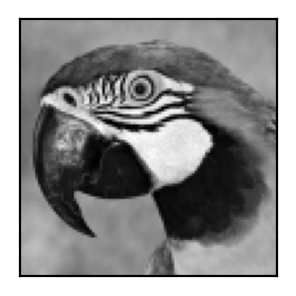

In [5]:
parrot = cv2.imread('parrot.bmp')
parrot = cv2.cvtColor(parrot, cv2.COLOR_BGR2GRAY)

display_image(parrot, "Obraz parrot.bmp")


Obraz parrot.bmp, współczynniki: 1.5, 1.5 -> rozmiar obrazka: 150x150


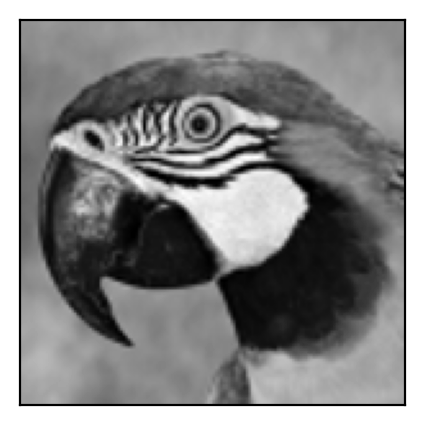


Obraz parrot.bmp, współczynniki: 2.5, 2.5 -> rozmiar obrazka: 250x250


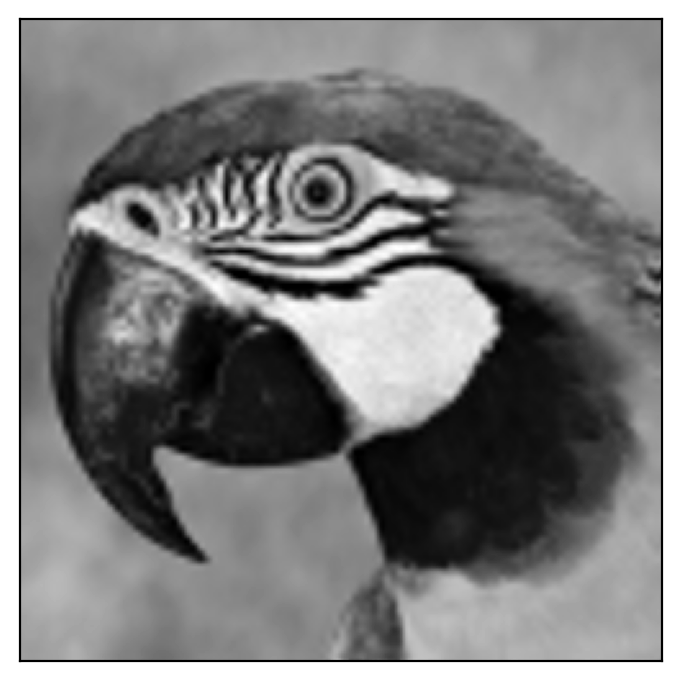


Obraz parrot.bmp, współczynniki: 1.5, 2.5 -> rozmiar obrazka: 150x250


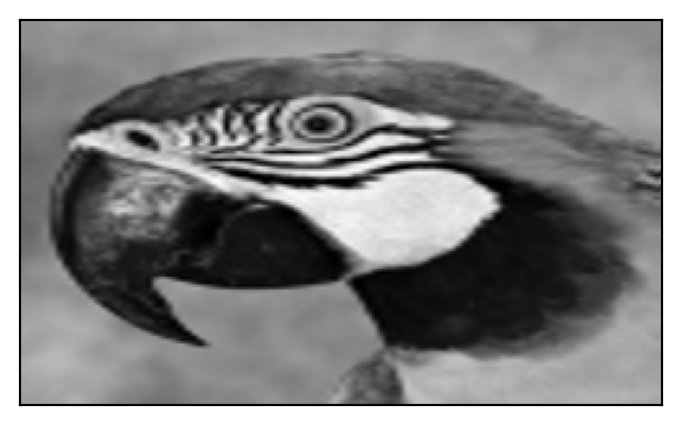


Obraz parrot.bmp, współczynniki: 0.6, 0.8 -> rozmiar obrazka: 60x80


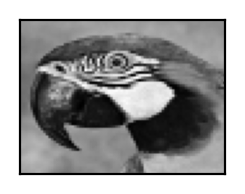

In [6]:
display_int_image(bicubic_interpolation(parrot, 1.5, 1.5), "Obraz parrot.bmp, współczynniki: 1.5, 1.5")
display_int_image(bicubic_interpolation(parrot, 2.5, 2.5), "Obraz parrot.bmp, współczynniki: 2.5, 2.5")
display_int_image(bicubic_interpolation(parrot, 1.5, 2.5), "Obraz parrot.bmp, współczynniki: 1.5, 2.5")
display_int_image(bicubic_interpolation(parrot, 0.6, 0.8), "Obraz parrot.bmp, współczynniki: 0.6, 0.8")

### Interpolacja dwusześcienna dla obrazka *chessboard.bmp*


Obraz chessboard.bmp, rozmiar obrazka: 16x16


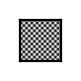

In [7]:
chessboard = cv2.imread('chessboard.bmp')
chessboard = cv2.cvtColor(chessboard, cv2.COLOR_BGR2GRAY)

display_image(chessboard, "Obraz chessboard.bmp")


Obraz chessboard.bmp, współczynniki: 1.5, 1.5 -> rozmiar obrazka: 24x24


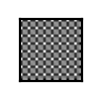


Obraz chessboard.bmp, współczynniki: 2.5, 2.5 -> rozmiar obrazka: 40x40


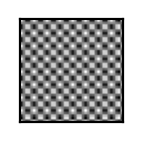


Obraz chessboard.bmp, współczynniki: 1.5, 2.5 -> rozmiar obrazka: 24x40


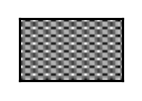


Obraz chessboard.bmp, współczynniki: 0.6, 0.8 -> rozmiar obrazka: 10x13


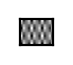


Obraz chessboard.bmp, współczynniki: 5.0, 5.0 -> rozmiar obrazka: 80x80


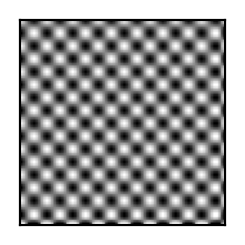


Obraz chessboard.bmp, współczynniki: 10.0, 8.0 -> rozmiar obrazka: 160x128


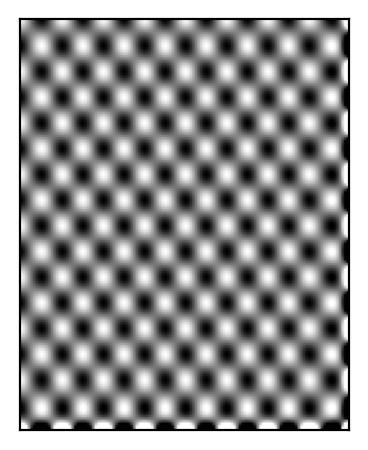

In [8]:
display_int_image(bicubic_interpolation(chessboard, 1.5, 1.5), "Obraz chessboard.bmp, współczynniki: 1.5, 1.5")
display_int_image(bicubic_interpolation(chessboard, 2.5, 2.5), "Obraz chessboard.bmp, współczynniki: 2.5, 2.5")
display_int_image(bicubic_interpolation(chessboard, 1.5, 2.5), "Obraz chessboard.bmp, współczynniki: 1.5, 2.5")
display_int_image(bicubic_interpolation(chessboard, 0.6, 0.8), "Obraz chessboard.bmp, współczynniki: 0.6, 0.8")
display_int_image(bicubic_interpolation(chessboard, 5., 5.), "Obraz chessboard.bmp, współczynniki: 5.0, 5.0")
display_int_image(bicubic_interpolation(chessboard, 10., 8.), "Obraz chessboard.bmp, współczynniki: 10.0, 8.0")


---

#### Dokonaj porównania liczby operacji arytmetycznych i dostępów do pamięci koniecznych przy realizacji obu metod interpolacji: dwuliniowej i dwusześciennej.

Interpolacja dwusześcienna pozwala osiągnąć znacznie lepszy rezultat interpolacji, co widać szczególnie na przykładzie obrazka *chessboard.bmp* - mimo że dla większej skali widać "rozmazanie", to wciąż efekt końcowy istotnie przypomina szachownicę, czego nie można powiedzieć w przypadku poprzednich implementowanych metod interpolacji.

Jeżeli chodzi o koszt obliczeniowy i ilość odwołań do pamięci, to interpolacja dwusześcienna jest o wiele bardziej wymagająca od interpolacji dwuliniowej. Oprócz 4 punktów $A, B, C, D$ (a konkretnie wartości pikseli w tych punktach na obrazie) potrzebujemy również "dalszych" sąsiadów do obliczania pochodnych, mianowicie punkty na lewo od $A$ i $D$, na prawo od $B$ i $C$, od góry dla $A$ i $B$, od dołu dla $D$ i $C$ oraz jeszcze na prawo i w dół od $C$ - jeżeli nie wychodzimy poza zakres, to jest to dodatkowe 9 punktów, do których się odwołujemy.

Liczba operacji arytmetycznych również wzrasta, głównie w związku z obliczaniem pochodnych i później obliczaniem wartości, w którym mamy mnożenie macierzy o 2 razy większych wymiarach. Należy wziąć pod uwagę także więcej operacji porównywania związanych z zapobieganiem wychodzenia poza zakres obrazka.

---
